In [11]:
USE_WIDGETS = False

def importEssentialLibs(USE_WIDGETS):
    import numpy as np
    if USE_WIDGETS:
        %matplotlib widget
    else:
        %matplotlib inline
    import matplotlib as mpl
    mpl.rc('text', usetex = True)
    mpl.rc('font', family = 'serif', size = 10)
    import matplotlib.pyplot as plt
    import scipy.signal as signal
    
    return np, mpl, plt, signal

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

#Locale settings
import locale
# Set to German locale to get comma decimal separater
locale.setlocale(locale.LC_NUMERIC, "de_DE")

plt.rcParams['text.usetex'] = True 
plt.rcParams.update({'font.size': 10,'font.family': 'serif'})
#plt.rcParams['figure.figsize'] = (.75*6.5, .75*4.5)

plt.rcParams['axes.formatter.use_locale'] = True

plt.rcParams['text.latex.preamble'] = r'\usepackage{icomma}\usepackage{upgreek}'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsfonts}'

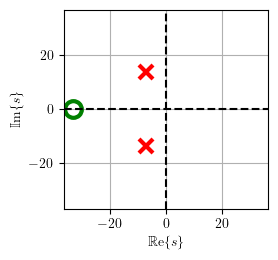

In [27]:
np, mpl, plt, signal = importEssentialLibs(USE_WIDGETS)
#from dosutils import zplane

preskok = True

if(preskok):
    b = np.array([0, 7.136, 237.9])
    a = np.array([1, 14.71, 237.9])
else:
    b = np.array([0, 7.136, 23.79])
    a = np.array([1, 14.71, 23.79])

z, p, k, ax = splane(b, a, preskok = preskok)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib import patches

def splane(b, a, ax = None, preskok=True):
    """Plot the complex z-plane given a transfer function.
    """

    # get a figure/plot
    if ax == None:
        w, h = plt.figaspect(1)
        fig, ax = plt.subplots(1, figsize=(.45*6.5, .45*6.5))
        plt.subplots_adjust(left = 0.2, bottom = 0.2)

    # create the unit circle
    #uc = patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
    #ax.add_patch(uc)
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = b[0]/a[0]
    
    ## Count same poles/zeros
    # Make poles and zeros dictionaries
    poleCounts = {}
    for i in range(len(p)):
        if p[i].imag < 0:
            key = f'%f-%fj' % (p[i].real, -p[i].imag)
        else:
            key = f'%f+%fj' % (p[i].real, p[i].imag)
        if key in poleCounts:
            poleCounts[key] += 1
        else:
            poleCounts[key] = 1
    zeroCounts = {}
    
    for i in range(len(z)):
        if z[i].imag < 0:
            key = f'%f-%fj' % (z[i].real, -z[i].imag)
        else:
            key = f'%f+%fj' % (z[i].real, z[i].imag)
        if key in zeroCounts:
            zeroCounts[key] += 1
        else:
            zeroCounts[key] = 1
    
    # Plot the poles and set marker properties
    poleKeys = list(poleCounts.keys())
    for i in range(len(poleKeys)):
        pole = complex(poleKeys[i])
        ti = plt.plot(pole.real, pole.imag, 'rx', ms=10)
        plt.setp( ti, markersize=10.0, markeredgewidth=3.0, markeredgecolor='r', markerfacecolor='r')
        # place number of the same poles near the marker
        if poleCounts[poleKeys[i]] > 1:
            textstr = f'%d' % (poleCounts[poleKeys[i]])
            ax.text(pole.real+0.05, pole.imag+0.05, textstr, color='r')

    # Plot the zeros and set marker properties
    zeroKeys = list(zeroCounts.keys())
    for i in range(len(zeroKeys)):
        zero = complex(zeroKeys[i])
        t2 = plt.plot(zero.real, zero.imag, 'go', ms=10)
        plt.setp( t2, markersize=12.0, markeredgewidth=3.0, markeredgecolor='g', markerfacecolor='None')
        # place number of the same zeros near the marker
        if zeroCounts[zeroKeys[i]] > 1:
            textstr = f'%d' % (zeroCounts[zeroKeys[i]])
            ax.text(zero.real+0.05, zero.imag+0.05, textstr, color='g')
    allVals = np.concatenate((abs(p.real), abs(p.imag), abs(z.real), abs(z.imag)));
    limVal = max(allVals)*1.1
    if limVal < 1.1:
        limVal = 1.1
    
    ax.plot([-limVal, limVal], [0, 0], 'k--')
    ax.plot([0, 0], [-limVal, limVal], 'k--')
    
    ax.grid()
    
    ax.set_xlim([-limVal, limVal])
    ax.set_ylim([-limVal, limVal])
    
    ax.set_xlabel('$\mathbb{R}$e$\{s\}$')
    ax.set_ylabel('$\mathbb{I}$m$\{s\}$')
    
    if(preskok):
        plt.savefig('fig_zplane/Preskok.pdf', format='pdf', bbox_inches='tight') 
    else:
        plt.savefig('fig_zplane/BezPreskok.pdf', format='pdf', bbox_inches='tight')
    
    return z, p, k, ax

In [45]:

print('Nule bez preskok ',np.roots(np.array([0, 7.136, 23.79])))
print('Polovi bez preskok ',np.roots(np.array([1, 14.71, 23.79])))

print('Nule sa preskok ',np.roots(np.array([0, 7.136, 237.9])))
print('Polovi sa preskok',np.roots(np.array([1, 14.71, 237.9])))

Nule bez preskok  [-3.33380045]
Polovi bez preskok  [-12.86009083  -1.84990917]
Nule sa preskok  [-33.33800448]
Polovi sa preskok [-7.355+13.55743246j -7.355-13.55743246j]
